<a href="https://colab.research.google.com/github/mmaithani/Singapore-Residents-Data-EDA/blob/master/final_data_analysis_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis on Singapore Residents Data


*   Data cleaning (openRefine)
*   Data exploratory analysis

## **Part 1** - The data contains Population by *ethnicity, age and gender* for the country of Singapore from the year 1957 to 2018. 
1. Identify the largest Ethnic group in Singapore. Their average population growth over the
years and what proportion of the total population do they constitute.
2. Identify the largest age group in Singapore. Their average population growth over the
years and what proportion of the total population do they constitute.
3. Identify the group (by age, ethnicity and gender) that:

  a. Has shown the highest growth rate

  b. Has shown the lowest growth rate

  c. Has remained the same
4. Plot a graph for population trends


## Import Modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests
from io import StringIO

## Reading Data from link

In [ ]:
orig_url='https://drive.google.com/file/d/1KJi-KZYMcuWIO4dwXS8P8eBNUP7LDk8U/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)

**changing column names**

In [ ]:
data.columns= ['year','ethnicity group/gender', 'age', 'population']

**No null values**

In [ ]:
data.info()

In [ ]:
data.tail()

*every ethnicity category is of count 1364*

In [ ]:
data['ethnicity group/gender'].unique()

In [ ]:
data['age'].unique()

## Data is not in good shape to do EDA
So we first clean it with openRefine then do further analysis

*exporting data ---*

In [ ]:
data.to_csv("raw.csv")

# Cleaned data using openrefine where i separated colums and make new ethnity group and gender columns for better data interpretation

[Drive public of processed data](https://drive.google.com/file/d/1G5RItPdQn-nThKIHNBcHB3x4njmxe8Kc/view?usp=sharing)

In [141]:
data2_url ='https://drive.google.com/file/d/1G5RItPdQn-nThKIHNBcHB3x4njmxe8Kc/view?usp=sharing'
file_id = data2_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data2 = pd.read_csv(csv_raw)

## 1. largest ethnic group
##  - > "Chinese ethnicity group" are the largest in singapore

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='ethnicity group', y='population',hue= 'gender',data=data2)
plt.figtext(.25,.8,'chinese are the largest',fontsize=13,ha='center')

## Over the years chinese ethnicity group population *is* continously increasing

In [ ]:
plt.figure(figsize=(40,10))
sns.barplot(x='year', y='population',hue='ethnicity group',data=data2)

#what proportion of the total population do they constitute -
##**- > chinese recent(2018) total population by combining all age groups is:3975586**

In [ ]:
# using first dataset where we have total ethnicity groups 
data.tail()
data['ethnicity group/gender'].unique()

**selecting object grouped on multiple columns**
* extracting data where year is 2018 , total chinese population 



In [ ]:
g=data.groupby(['year','ethnicity group/gender'],sort=True)
# g.last()

In [ ]:
temp =g.get_group((2018,'Total Chinese'))
temp

In [ ]:
pd.to_numeric(temp['population']).sum()

In [ ]:
import plotly.express as px
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data, x='ethnicity group/gender', y='population')
fig.show()

In [ ]:
pd.to_numeric(temp['population']).sum()

# 2. Identify the largest age group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.
# -> 65 Years & Over age group are the largest = 14519050
# -> 5-9 Years age group total population integrated is also 14519050


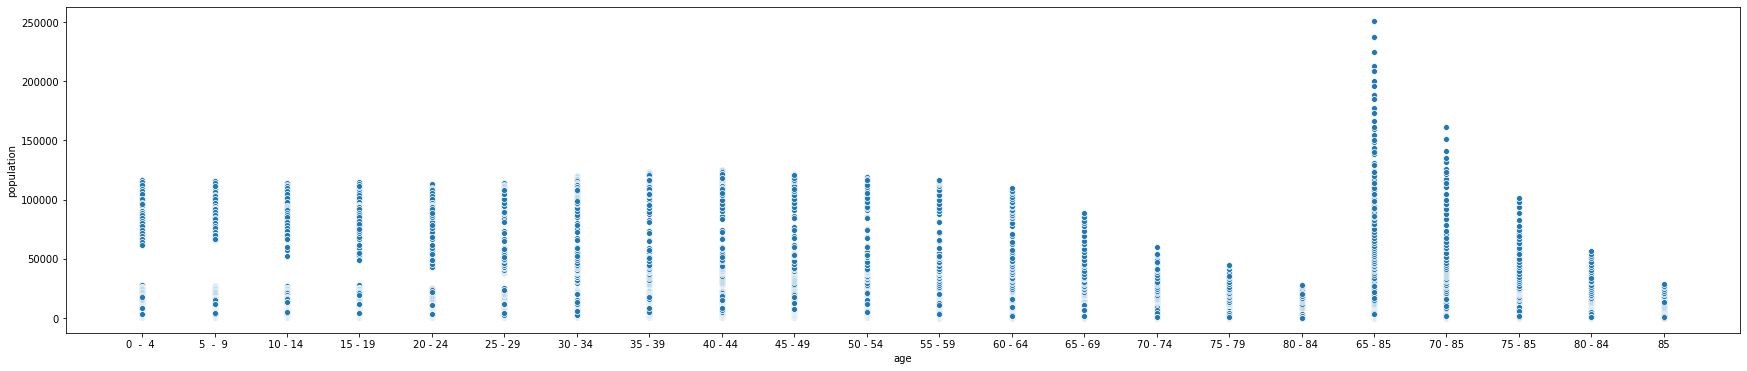

In [136]:
plt.figure(figsize=(30,6))
sns.scatterplot(x='age', y='population',data=data2)

#3. Identify the group (by age, ethnicity and gender) that:

  a. Chinese Has shown the highest growth rate

  b. indians and other Ethnic group has shown the lowest growth rate

  c. others and indians Has remained the same not much change

Text(0.25, 0.8, 'while other and indians ethnicity are the static over the years')

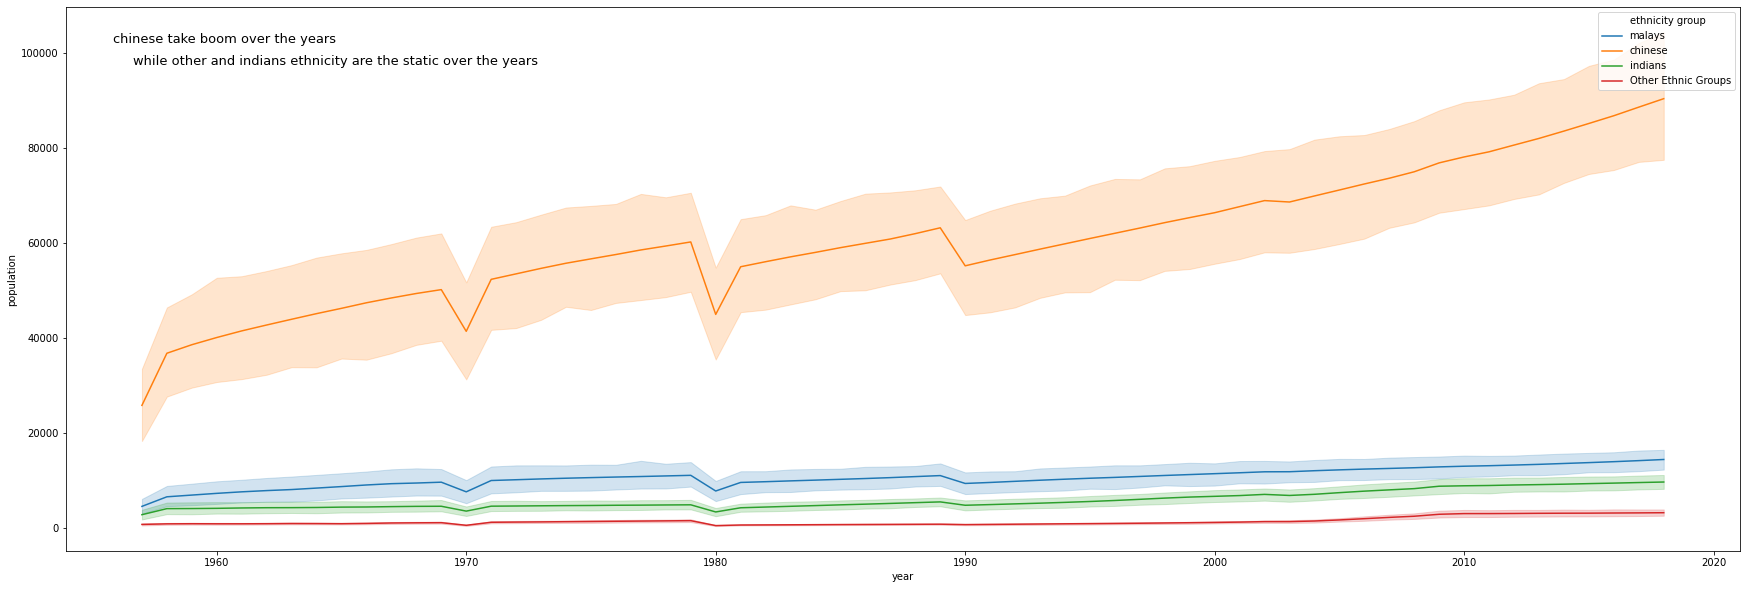

In [138]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='population',hue='ethnicity group',markers=True, dashes=False, data=data2)

plt.figtext(.25,.83,'chinese take boom over the years',fontsize=13,ha='right')
plt.figtext(.25,.8,'while other and indians ethnicity are the static over the years',fontsize=13,ha='center')

#4. Plot a graph for population trends

In [139]:
import plotly.express as px
# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data, x='age', y='population')
fig.show()

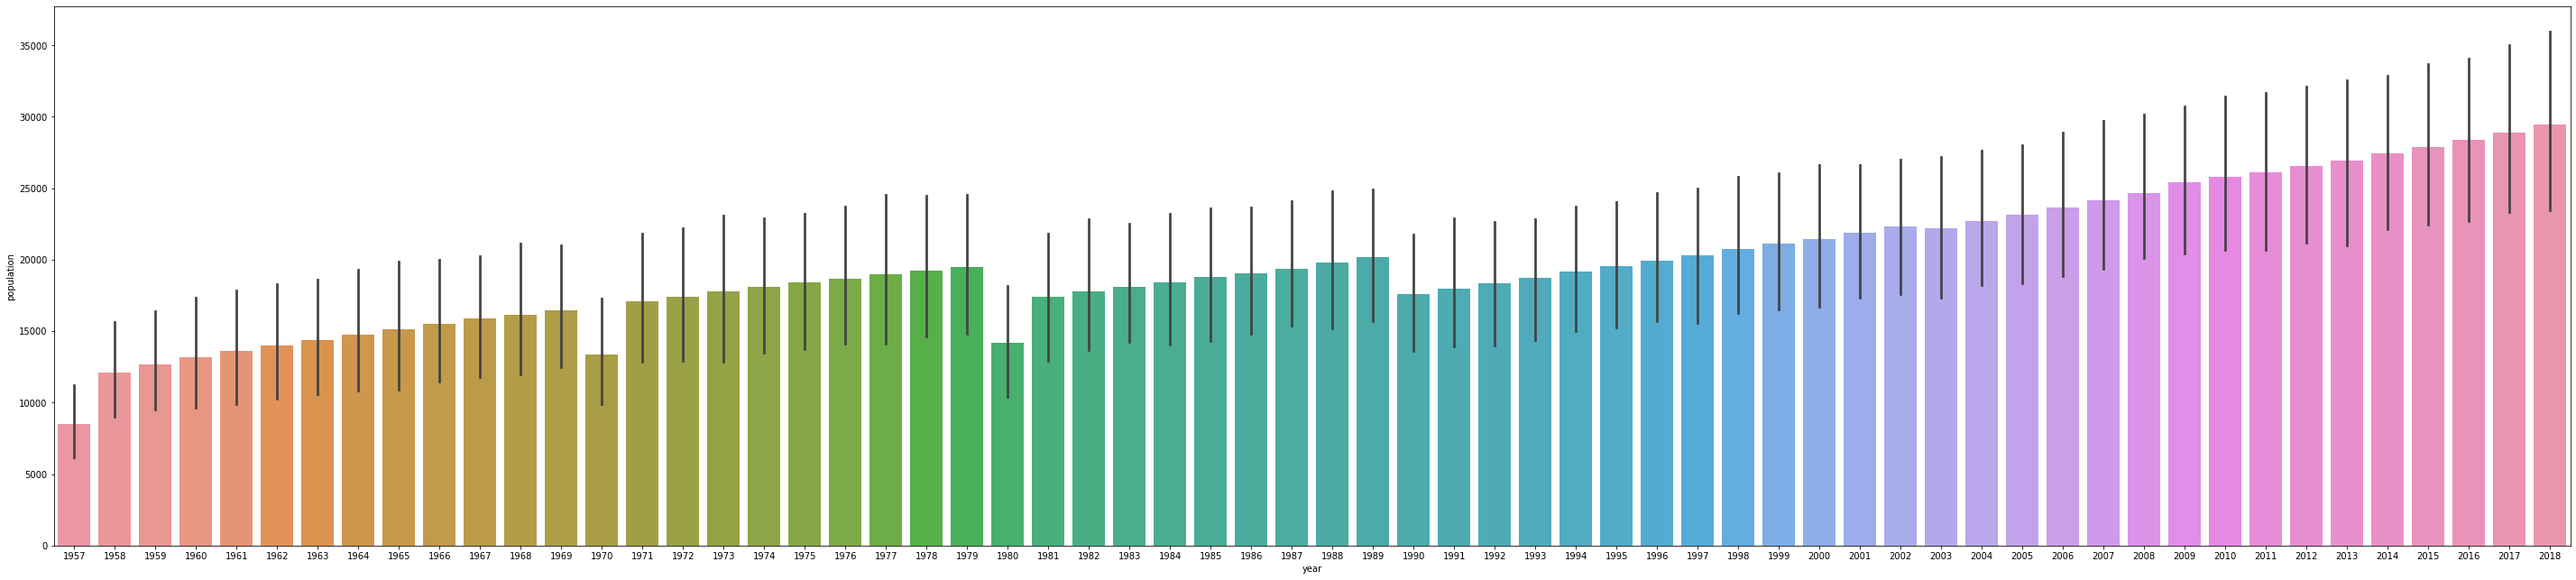

In [140]:
plt.figure(figsize=(50,11))
sns.barplot(x='year', y='population',data=data2)